# Spin Glasses

This is a simple notebook to test my code.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pil
import dimod 
from neal import SimulatedAnnealingSampler
import networkx as nx
import dwave_networkx as dnx

In [22]:
import utils as ut

In [23]:
Jproblem = np.loadtxt('../fortran/problems/HFCL.dat')

In [24]:
Jproblem.shape

(64, 64)

In [25]:
h = np.zeros(64)

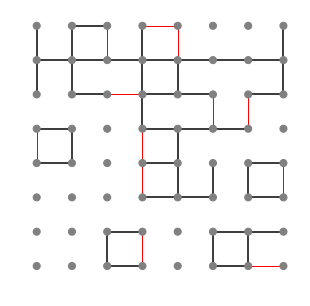

In [26]:
ut.DrawSquareLattice_Problem(h=h,J=Jproblem,L=8)

In [27]:
Jconn = np.loadtxt('../fortran/problems/square_lattice.dat')

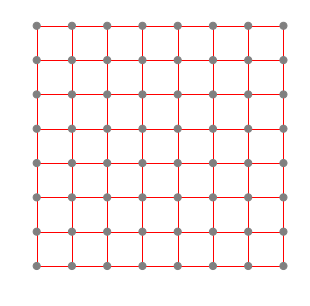

In [28]:
ut.DrawSquareLattice_Problem(h=h,J=Jconn,L=8)

In [29]:
Jchim = np.loadtxt('../fortran/problems/chimera_lattice.dat')

In [30]:
hchim = np.zeros(8*4*4)

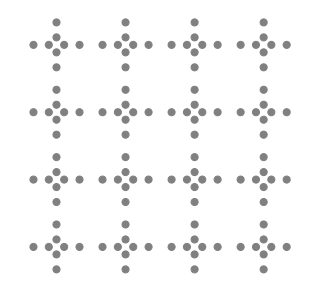

In [31]:
ut.DrawChimeraGraph_Problem(h=hchim,J=Jchim,L=4, outfile='./plots/chimera_graph.pdf')

In [32]:
Jchim[16, 40]

0.0

In [391]:
# let's try to solve the problem with the D Wave neal solver.
edges = np.loadtxt('../src/problems/HFCL_edges_list.dat')

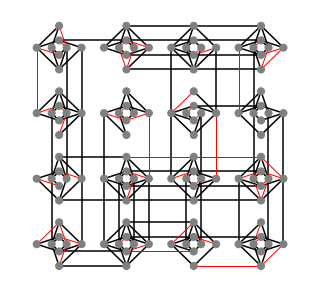

In [392]:
ut.DrawChimeraGraph_Problem(h=hchim,J=edges,L=4, outfile='HFCL_chimera.pdf')

In [393]:
8*(4**2)

128

In [394]:
J = {}
for i in range(edges.shape[0]):
    J[(int(edges[i,0]),int(edges[i,1]))]=edges[i,2]

In [395]:
h = list(np.zeros(8*4**2))

In [396]:
sampler = SimulatedAnnealingSampler()

In [397]:
bqm = dimod.BinaryQuadraticModel.from_ising(h,J)

In [398]:
response=sampler.sample(bqm, num_reads=1000, seed=32, beta_range=[0.1,2.3])

In [399]:
min_en = np.min(response.record.energy)

In [400]:
min_s = response.record.sample[np.argmin(response.record.energy)]

In [401]:
min_en

-356.0

In [402]:
min_s

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1], dtype=int8)

In [403]:
energies_fortran = np.loadtxt('../src/output/energies_SA_HFCL.dat')

In [404]:
np.min(energies_fortran)

-356.0

In [405]:
states = np.loadtxt('../src/output/solutions_SA_HFCL.dat')

In [406]:
mysa_state = states[np.argmin(energies_fortran)]
mysa_state

array([ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1.,
        1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
       -1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.])

In [122]:
np.where(response.record.energy == min_en)[0].shape

(418,)

In [112]:
alpha = 0.02
R = 0.25

In [113]:
en_th = min_en - 2*min_en*alpha
en_th

-376.31999999999999

In [125]:
fit_samples = []
j=0
for i in range(1000):
    if response.record.energy[i] < en_th:
        fit_samples.append(response.record.sample[i])
        j+=1
num_fit_samples = j
    

In [126]:
def hamming_distance(s1,s2):
    
    return 0.5*np.sum(np.abs(s1-s2))

In [127]:
a = np.array([-1,1, 1])
b = np.array([1,1, -1])

In [128]:
a=a.reshape(1,-1)

In [129]:
a.shape

(1, 3)

In [130]:
hamming_distance(a,b)

2.0

In [131]:
fit_samples = np.array(fit_samples)

In [132]:
edges_div = []
for i in range(num_fit_samples-1):
    for j in range(i+1,num_fit_samples):
        if hamming_distance(fit_samples[i],fit_samples[j])>8*(4**2)*R:
            edges_div.append((i,j))    

In [133]:
G = nx.Graph()

In [134]:
num_fit_samples

855

In [136]:
G.add_edges_from(edges_div)

In [137]:
# nx.draw(G)
# plt.show()

In [141]:
sampler = SimulatedAnnealingSampler()
max_clique = dnx.algorithms.clique.maximum_clique(G=G, sampler=sampler, lagrange=2, **{'sweeps':10000})

In [142]:
max_clique

[3, 26, 57, 108, 118, 182, 202, 219, 533, 605, 707, 712, 750]

In [143]:
len(max_clique)

13

In [144]:
# alternative method
diversity = []
for i_restart in range(1): 
    diverse_samples = []
    ind = np.random.random_integers(high=num_fit_samples)
    diverse_samples.append(fit_samples[ind])
    for i_try in range(10000):
        ind = np.random.random_integers(high=num_fit_samples)
        distances = []
        for j = 1, num_fit_samples:
            if j!=ind:
                distances.append(hammin)
    

SyntaxError: invalid syntax (<ipython-input-144-68eded77ac1b>, line 10)